<a href="https://colab.research.google.com/github/archajoshy/DL/blob/main/CNN_assg(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
! unzip "/content/dl_dataset.zip"

Archive:  /content/dl_dataset.zip
  inflating: dl_dataset/img_1.jpg    
  inflating: dl_dataset/img_10.jpg   
  inflating: dl_dataset/img_11.jpg   
  inflating: dl_dataset/img_12.jpg   
  inflating: dl_dataset/img_13.jpg   
  inflating: dl_dataset/img_14.jpg   
  inflating: dl_dataset/img_15.jpg   
  inflating: dl_dataset/img_16.jpg   
  inflating: dl_dataset/img_17.jpg   
  inflating: dl_dataset/img_18.jpg   
  inflating: dl_dataset/img_19.jpg   
  inflating: dl_dataset/img_2.jpg    
  inflating: dl_dataset/img_20.jpg   
  inflating: dl_dataset/img_3.jpg    
  inflating: dl_dataset/img_4.jpg    
  inflating: dl_dataset/img_5.jpg    
  inflating: dl_dataset/img_6.jpg    
  inflating: dl_dataset/img_7.jpg    
  inflating: dl_dataset/img_8.jpg    
  inflating: dl_dataset/img_9.jpg    


In [3]:
! unzip "/content/sarath face.zip"

Archive:  /content/sarath face.zip
  inflating: sarath face/IMG_20220715_150848.jpg  
  inflating: sarath face/IMG_20220715_150848_1.jpg  
  inflating: sarath face/IMG_20220715_150849.jpg  
  inflating: sarath face/IMG_20220715_150850.jpg  
  inflating: sarath face/IMG_20220715_150850_1.jpg  
  inflating: sarath face/IMG_20220715_150851.jpg  
  inflating: sarath face/IMG_20220715_150852.jpg  
  inflating: sarath face/IMG_20220715_150852_1.jpg  
  inflating: sarath face/IMG_20220715_150853.jpg  
  inflating: sarath face/IMG_20220715_150858.jpg  
  inflating: sarath face/IMG_20220715_150859.jpg  
  inflating: sarath face/IMG_20220715_150903.jpg  
  inflating: sarath face/IMG_20220715_150904.jpg  
  inflating: sarath face/IMG_20220715_150907.jpg  
  inflating: sarath face/IMG_20220715_150908.jpg  
  inflating: sarath face/IMG_20220715_150912.jpg  
  inflating: sarath face/IMG_20220715_150913.jpg  
  inflating: sarath face/IMG_20220715_150917.jpg  
  inflating: sarath face/IMG_20220715_150

In [4]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import Augmentor
p = Augmentor.Pipeline("/content/dl_dataset")
p.flip_left_right(0.5)
p.black_and_white(0.1)
p.rotate(0.3, 10, 10)
p.skew(0.4, 0.5)
p.zoom(probability = 0.2, min_factor = 1.1, max_factor = 1.5)
p.sample(100)

Initialised with 20 image(s) found.
Output directory set to /content/dl_dataset/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=468x960 at 0x7FA1D2846050>: 100%|██████████| 100/100 [00:11<00:00,  8.37 Samples/s]


In [6]:
q = Augmentor.Pipeline("/content/sarath face")
q.flip_left_right(0.5)
q.black_and_white(0.1)
q.rotate(0.3, 10, 10)
q.skew(0.4, 0.5)
q.zoom(probability = 0.2, min_factor = 1.1, max_factor = 1.5)
q.sample(100)

Initialised with 30 image(s) found.
Output directory set to /content/sarath face/output.

Processing <PIL.Image.Image image mode=1 size=3008x6528 at 0x7FA1D283C310>: 100%|██████████| 100/100 [02:55<00:00,  1.76s/ Samples]


In [2]:
train_dir="/content/train_data"
valid_dir="/content/test_data"

In [3]:
#!rmdir /content/train_data/.ipynb_checkpoints

rmdir: failed to remove '/content/train_data/.ipynb_checkpoints': No such file or directory


In [4]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale=1./255)
valid_datagen=ImageDataGenerator(rescale=1./255)

In [5]:
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=10,
    class_mode="binary",
    seed=42
)
valid_data = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(224, 224),
    batch_size=1,
    class_mode="binary",
    seed=42
)

Found 200 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


In [6]:
model_1=tf.keras.models.Sequential([
 tf.keras.layers.Conv2D(filters=10,
                        kernel_size=3,
                        activation="relu",
                        input_shape=(224,224,3)),
  tf.keras.layers.Conv2D(10,3,activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2,
                            padding="valid"),
  tf.keras.layers.Conv2D(10,3,activation="relu"),
  tf.keras.layers.Conv2D(10,3,activation="relu"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1,activation="sigmoid")                                                                               
                                    
])

In [7]:
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(0.0001),
                metrics=["accuracy"])

In [8]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

In [9]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3,restore_best_weights=True)

In [10]:
history=model_1.fit(train_data,
                    epochs=100,
                    validation_data=valid_data,
                    callbacks=[callback]
                    )

Epoch 1/100
20/20 [==============================] - 30s 1s/step - loss: 0.6512 - accuracy: 0.5450 - val_loss: 0.5694 - val_accuracy: 0.7200
Epoch 2/100
20/20 [==============================] - 28s 1s/step - loss: 0.5211 - accuracy: 0.8700 - val_loss: 0.4167 - val_accuracy: 0.9600
Epoch 3/100
20/20 [==============================] - 27s 1s/step - loss: 0.3509 - accuracy: 0.9350 - val_loss: 0.2346 - val_accuracy: 0.9600
Epoch 4/100
20/20 [==============================] - 27s 1s/step - loss: 0.2063 - accuracy: 0.9450 - val_loss: 0.1260 - val_accuracy: 0.9600
Epoch 5/100
20/20 [==============================] - 28s 1s/step - loss: 0.1326 - accuracy: 0.9650 - val_loss: 0.0718 - val_accuracy: 0.9600


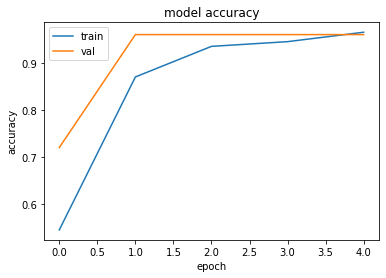

In [11]:
from matplotlib import pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

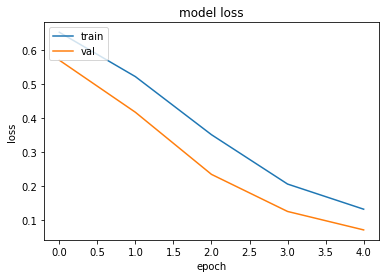

In [12]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [13]:
!pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 989 kB 5.1 MB/s 


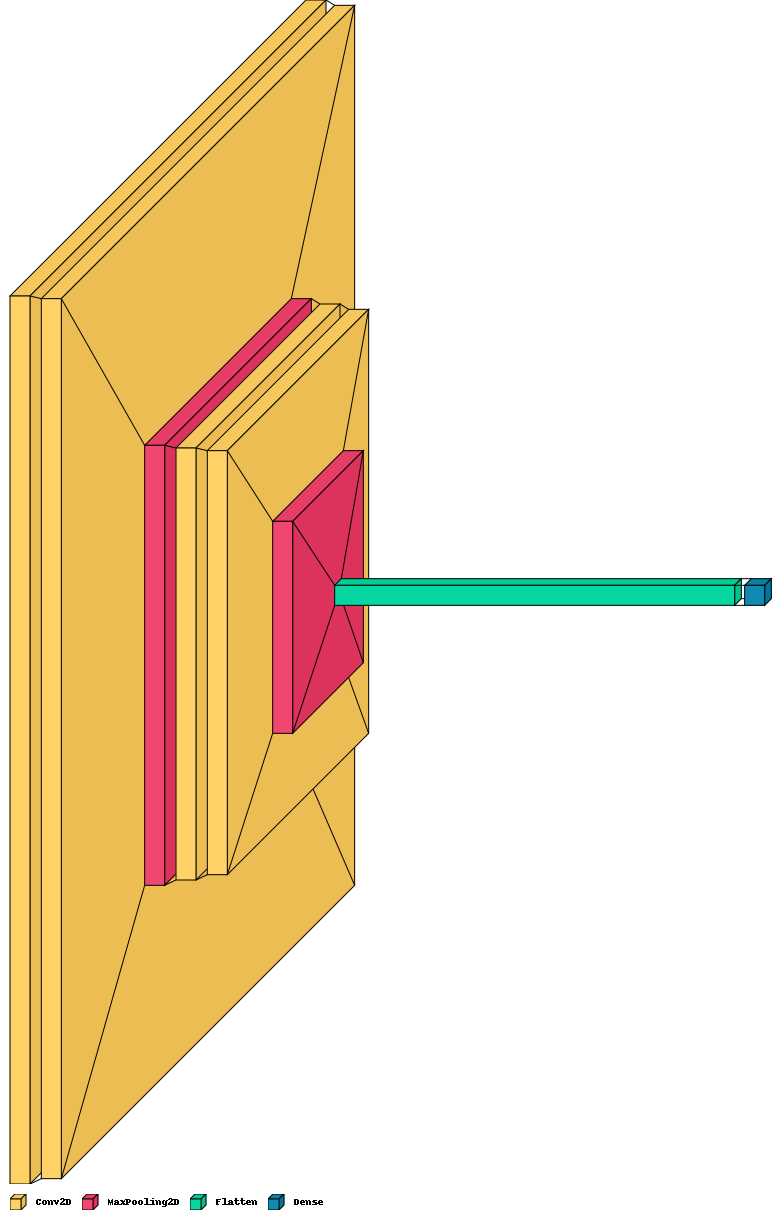

In [14]:
import visualkeras
visualkeras.layered_view(model_1,legend=True)

In [15]:
from tensorflow.keras.preprocessing import image

In [16]:
import numpy as np

In [27]:
def predictImage(filename):
  img1=image.load_img(filename,target_size=(224,224))

  plt.imshow(img1)

  Y=image.img_to_array(img1)

  X=np.expand_dims(Y,axis=0)
  val=model_1.predict(X)
  print(val)
  if val >=0.5:
    plt.xlabel("SARATH",fontsize=30)
  elif val <=0.5:
    plt.xlabel("ARCHA",fontsize=30)  


[[0.]]


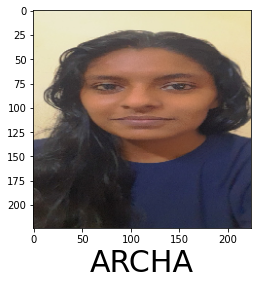

In [28]:
predictImage("/content/test_data/ARCHA/img_13.jpg")

[[1.]]


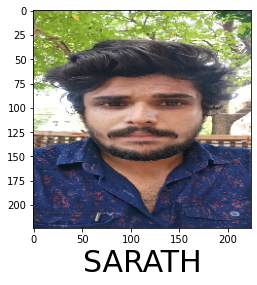

In [31]:
predictImage("/content/WhatsApp Image 2022-07-17 at 12.08.11 PM.jpeg")

[[0.]]


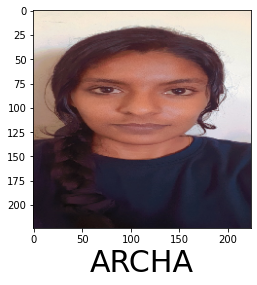

In [36]:
predictImage("/content/WhatsApp Image 2022-07-17 at 12.25.14 PM.jpeg")